In [ ]:
!git lfs clone https://huggingface.co/spaces/facebook/ov-seg

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'ov-seg'...
remote: Enumerating objects: 236, done.
remote: Counting objects: 100% (96/96), done.
remote: Compressing objects: 100% (96/96), done.
remote: Total 236 (delta 60), reused 0 (delta 0), pack-reused 140
Receiving objects: 100% (236/236), 142.75 KiB | 12.98 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [ ]:
cd ov-seg  

/content/ov-seg


In [ ]:
!pip install torch -i https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html
import torch
import torchvision
!pip install torchvision -i https://download.pytorch.org/whl/cu113/
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
!pip install gradio
!pip install  numpy>=1.18.5,<1.24.0
!pip install  cython
!pip install  scipy
!pip install  shapely
!pip install  timm
!pip install  h5py
!pip install  wandb
!pip install  fire
!pip install  opencv-python
!pip install  pandas
!pip install  ftfy
!pip install  regex
!pip install  tqdm
!pip install  gdown
!pip install open_clip_torch==1.3.0
!pip install git+https://github.com/facebookresearch/segment-anything.git 


Looking in indexes: https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.10/index.html, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://download.pytorch.org/whl/cu113/, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-r48flrpt
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-r48flrpt
  Resolved https://github.com/facebookresearch/detectron2.git to commit d4a5f28e01b2babbaba9f90198fb95f5c661cccd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False Fal

<ipython-input-64-5007d754ff0c>:280: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  pred_mask = np.array(pred_mask, dtype=np.int)


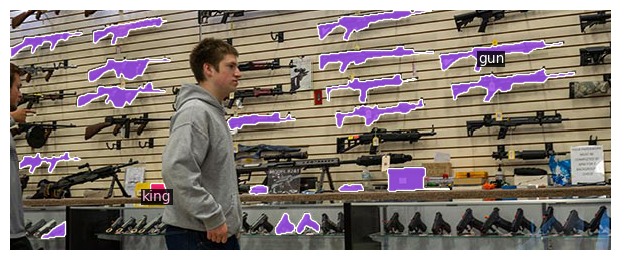

[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  [ True  True  True ...  True  True  True]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False Fal

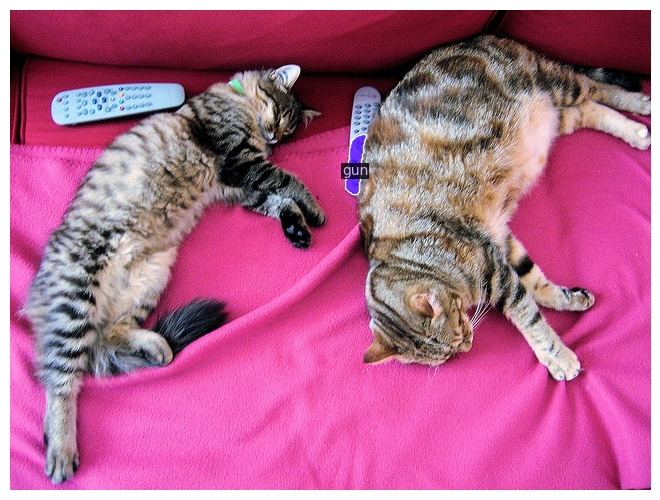

In [64]:

# Copyright (c) Facebook, Inc. and its affiliates.
# Copyright (c) Meta Platforms, Inc. All Rights Reserved
import open_vocab_seg
import multiprocessing as mp

import numpy as np
from PIL import Image

import numpy as np
import torch
from torch.nn import functional as F
import cv2
try:
    import detectron2
except:
    import os
    os.system('pip install git+https://github.com/facebookresearch/detectron2.git')
from detectron2.data import MetadataCatalog
from detectron2.structures import BitMasks
from detectron2.engine.defaults import DefaultPredictor
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.modeling.postprocessing import sem_seg_postprocess

from detectron2.config import get_cfg

from detectron2.projects.deeplab import add_deeplab_config
from detectron2.data.detection_utils import read_image
from open_vocab_seg import add_ovseg_config
# from open_vocab_seg.utils import VisualizationDemo, SAMVisualizationDemo
import open_clip
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry 
from open_vocab_seg.modeling.clip_adapter.adapter import PIXEL_MEAN, PIXEL_STD
from open_vocab_seg.modeling.clip_adapter.utils import crop_with_mask

from detectron2.data import MetadataCatalog
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry 
import open_clip
#===========chognxie 



class OVSegVisualizer(Visualizer):
    def __init__(self, img_rgb, metadata=None, scale=1.0, instance_mode=ColorMode.IMAGE, class_names=None):
        super().__init__(img_rgb, metadata, scale, instance_mode)
        self.class_names = class_names

    def draw_sem_seg(self, sem_seg, area_threshold=None, alpha=0.8):
        """
        Draw semantic segmentation predictions/labels.

        Args:
            sem_seg (Tensor or ndarray): the segmentation of shape (H, W).
                Each value is the integer label of the pixel.
            area_threshold (int): segments with less than `area_threshold` are not drawn.
            alpha (float): the larger it is, the more opaque the segmentations are.

        Returns:
            output (VisImage): image object with visualizations.
        """
        if isinstance(sem_seg, torch.Tensor):
            sem_seg = sem_seg.numpy()
        labels, areas = np.unique(sem_seg, return_counts=True)
        sorted_idxs = np.argsort(-areas).tolist()
        labels = labels[sorted_idxs]
        class_names = self.class_names if self.class_names is not None else self.metadata.stuff_classes

        for label in filter(lambda l: l < len(class_names), labels):
            try:
                mask_color = [x / 255 for x in self.metadata.stuff_colors[label]]
            except (AttributeError, IndexError):
                mask_color = None

            binary_mask = (sem_seg == label).astype(np.uint8)

            from IPython.display import display
            from PIL import Image
            # print('画mask图像')
            # display(Image.fromarray((sem_seg == label)))
  


            text = class_names[label]
            self.draw_binary_mask(
                binary_mask,
                color=mask_color,
                edge_color=(1.0, 1.0, 240.0 / 255),
                text=text,
                alpha=alpha,
                area_threshold=area_threshold,
            )
        return self.output

class SAMVisualizationDemo(object):
    def __init__(self, cfg, granularity, sam_path, ovsegclip_path, instance_mode=ColorMode.IMAGE, parallel=False):
        self.metadata = MetadataCatalog.get(
            cfg.DATASETS.TEST[0] if len(cfg.DATASETS.TEST) else "__unused"
        )

        self.cpu_device = torch.device("cpu")
        self.instance_mode = instance_mode

        self.parallel = parallel
        self.granularity = granularity
        sam = sam_model_registry["vit_l"](checkpoint=sam_path).cuda()
        self.predictor = SamAutomaticMaskGenerator(sam, points_per_batch=16)#加载sam模型.
        self.clip_model, _, _ = open_clip.create_model_and_transforms('ViT-L-14', pretrained=ovsegclip_path)#加载clip模型
        # print(self.clip_model,'加载了clip模型')

    def run_on_image(self, ori_image, class_names):
        height, width, _ = ori_image.shape
        if width > height:
            new_width = 1280
            new_height = int((new_width / width) * height)
        else:
            new_height = 1280
            new_width = int((new_height / height) * width)
        image = cv2.resize(ori_image, (new_width, new_height))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB) # ori_image原始图片, images: 1280的图片.
        visualizer = OVSegVisualizer(ori_image, self.metadata, instance_mode=self.instance_mode, class_names=class_names)#==============这个只是用来最后可视化图像的.
        #利用sam看来生成图片里面全部的maks.
        with torch.no_grad(), torch.cuda.amp.autocast():
            masks = self.predictor.generate(image)
        # print(masks,9999999999999999999999999999999999999999999999999999)
        pred_masks = [masks[i]['segmentation'][None,:,:] for i in range(len(masks))]
        pred_masks = np.row_stack(pred_masks)
        print(pred_masks)
        pred_masks = BitMasks(pred_masks)
        print(pred_masks)
        bboxes = pred_masks.get_bounding_boxes()
        print(88888888888888888,bboxes)

        mask_fill = [255.0 * c for c in PIXEL_MEAN]
        # print(111111111111111111111,mask_fill)
        image = torch.as_tensor(image.astype("float32").transpose(2, 0, 1))

        regions = []
        for bbox, mask in zip(bboxes, pred_masks):
            region, _ = crop_with_mask(
                image,
                mask,
                bbox,
                fill=mask_fill,
            ) #用fill 填充新的图片,然后  根据box 抽取出来部分.
            #计算方法:#原图box部分乘以要的部分. 加上 原图box部分*maks不要的部分*填充值.
            regions.append(region.unsqueeze(0))
        regions = [F.interpolate(r.to(torch.float), size=(224, 224), mode="bicubic") for r in regions]












        pixel_mean = torch.tensor(PIXEL_MEAN).reshape(1, -1, 1, 1)
        pixel_std = torch.tensor(PIXEL_STD).reshape(1, -1, 1, 1)
        imgs = [(r/255.0 - pixel_mean) / pixel_std for r in regions]
        imgs = torch.cat(imgs)#=============各个box的图片
        if len(class_names) == 1:
            class_names.append('others')
        txts = [f'a photo of {cls_name}' for cls_name in class_names]

        # txts=class_names
        text = open_clip.tokenize(txts)
        img_batches = torch.split(imgs, 32, dim=0)#0维度每32个分一组.










        with torch.no_grad(), torch.cuda.amp.autocast():
            self.clip_model.cuda()
            text_features = self.clip_model.encode_text(text.cuda())
            text_features /= text_features.norm(dim=-1, keepdim=True)
            image_features = []
            for img_batch in img_batches:
                # image_feat = self.clip_model.encode_image(img_batch.cuda().half())
                image_feat = self.clip_model.encode_image(img_batch.cuda())
                image_feat /= image_feat.norm(dim=-1, keepdim=True)
                image_features.append(image_feat.detach())
            image_features = torch.cat(image_features, dim=0)#image_features 得到所有的图片特征.
            tmp=image_features @ text_features.T#================            #=============保留绝对值大于16的
            print(tmp,'打印置信度!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
            tmp[tmp<0.15]=0
            print('fdsklfjasdkljfadlsjfkladsjfkladsjflkajsd',tmp)
            class_preds = (100.0 * tmp).softmax(dim=-1)
            #=============保留绝对值大于16的






#================================================!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
            class_preds[class_preds<0.7]=0 #===========只保留概率大于0.9的 # 阈值还是要给, 不然低准读的大量也能进行干扰.


            print(1, image_features.shape)
            print(2, class_preds.shape)
            print(3, text_features.shape)
            # 1 torch.Size([27, 768])
            # 2 torch.Size([27, 2])   class_preds
# 3 torch.Size([2, 768])
            #class_preds每行一个图片, 一行表示这个图片在各个class上的分类概率 .


        select_cls = torch.zeros_like(class_preds)


















        max_scores, select_mask = torch.max(class_preds, dim=0) #保持dim=0的维度. 所以
        print(4,max_scores.shape) # 这个是class_num. 
        if len(class_names) == 2 and class_names[-1] == 'others':#如果只有一个分类
            select_mask = select_mask[:-1] #那么select去掉最后一个.
        if self.granularity < 1: # 置信度.如果小于1, 那么就对结果进行拓展, 一般来说写1即可.
            thr_scores = max_scores * self.granularity #阈值.
            select_mask = []
            if len(class_names) == 2 and class_names[-1] == 'others':
                thr_scores = thr_scores[:-1]
            for i, thr in enumerate(thr_scores):
                cls_pred = class_preds[:,i]
                locs = torch.where(cls_pred > thr)
                select_mask.extend(locs[0].tolist()) #select_mask进行拓展.
        for idx in select_mask:
            select_cls[idx] = class_preds[idx]
        print(select_cls.shape, 666666666666) # 最新的分类概率.
        print(pred_masks.tensor.shape, 666666666666) # 

# torch.Size([27, 2]) 666666666666
# torch.Size([27, 960, 1280]) 666666666666  27个图片,每个图片是960 1280的mask
        #====================================
        #select_cls加一个过滤


        semseg = torch.einsum("qc,qhw->chw", select_cls.float(), pred_masks.tensor.float().cuda()) #得到每一个类别的mask. 也就是27张图片在每一个分类上的mask叠加.
        print(semseg)
        # print('把tensor结果写入txt中进行查看细节',np.savetxt('2222222',  semseg.cpu().detach().numpy()))
        
        print(324234234234,semseg.shape) #torch.Size([2, 960, 1280])
        r = semseg
        blank_area = (r[0] == 0) #黑色区域.
        print(blank_area.shape, 9999999999999) # torch.Size([960, 1280])
        print(r.shape, 32423423423423423) # 
#         torch.Size([2, 960, 1280]) 32423423423423423


        pred_mask = r.argmax(dim=0).to('cpu') #========这里面写入的是0,1,2这种class信息.
        print('把tensor结果写入txt中进行查看细节',np.savetxt('111111111111111111111111',  pred_mask.detach().numpy()))
        print(len(np.array_str(pred_mask.detach().numpy())),3243242342343888888888888888888888888888888888888888888888888888888888888888888888)
        print(np.array_str(pred_mask.detach().numpy())[:1000],43333333333333333333333333333333)
        print(pred_mask,32222222222222222222222222222222222222222222222222222222222222222222)
        print(pred_mask.shape, 32423423423423423) #   # torch.Size([960, 1280]) 32423423423423423
        print(9999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999)
        pred_mask[blank_area] = 255
        pred_mask = np.array(pred_mask, dtype=np.int)
        pred_mask = cv2.resize(pred_mask, (width, height), interpolation=cv2.INTER_NEAREST) #还原到原始图片大小.
        print(324234234234234,width,height)
        vis_output = visualizer.draw_sem_seg(
            pred_mask
        )





        from IPython.display import display
        from PIL import Image
        # display(Image.fromarray(pred_mask))







        display((vis_output.fig))
        # display(Image.fromarray(np.uint8(vis_output.get_image())).convert('RGB'))
        return None, vis_output


import gradio as gr

import gdown

# ckpt_url = 'https://drive.google.com/uc?id=1cn-ohxgXDrDfkzC1QdO-fi8IjbjXmgKy'
# output = './ovseg_swinbase_vitL14_ft_mpt.pth'
# gdown.download(ckpt_url, output, quiet=False)

def setup_cfg(config_file):
    # load config from file and command-line arguments
    cfg = get_cfg()
    add_deeplab_config(cfg)
    add_ovseg_config(cfg)
    cfg.merge_from_file(config_file)
    cfg.freeze()
    return cfg


def inference(class_names,  granularity, input_img):
    mp.set_start_method("spawn", force=True) #设置多进程.
    config_file = './ovseg_swinB_vitL_demo.yaml'
    cfg = setup_cfg(config_file)
    # print(cfg,'看看cfg')
    demo = SAMVisualizationDemo(cfg, granularity, './sam_vit_l_0b3195.pth', './ovseg_clip_l_9a1909.pth')#=======后续有机器可以改大模型.
    class_names = class_names.split(',')
    img = read_image(input_img, format="BGR")
    _, visualized_output = demo.run_on_image(img, class_names)

    return Image.fromarray(np.uint8(visualized_output.get_image())).convert('RGB')

#==========开始调试模型
if 1:
  import requests
  url = "http://images.cocodataset.org/val2017/000000039769.jpg"
  image = Image.open(requests.get(url, stream=True).raw) #request方式加载数据.
  canshu=0.92 #这个数值0-1, 越大,返回的物品越少. 越小越容易都返回.




  # inference('cat,remote_controller', canshu , url) #用逗号切分classname
  url="https://img2.baidu.com/it/u=3577844526,3962936240&fm=253&fmt=auto&app=138&f=JPEG?w=551&h=500"




  #===============下面进行批量测试:
  for url in [
      

"https://content.gallup.com/origin/gallupinc/GallupSpaces/Production/Cms/POLL/mbu_qrqnee6u1qviaukyza.jpg",

"http://images.cocodataset.org/val2017/000000039769.jpg",


  ]:
    inference('gun,violence,women,hero,king', canshu , url) #用逗号切分classname






if 0: #调试代码时候不使用交互模型.
  gr.Interface(
      inference,
      inputs=[
          gr.Textbox(
              lines=1, placeholder=None, default='', label='class names'),
          gr.Slider(0, 1.0, 0.8, label="For Segment_Anything only, granularity of masks from 0 (most coarse) to 1 (most precise)"),
          gr.Image(type='filepath'),
      ],
      outputs=gr.components.Image(type="pil", label='segmentation map'),

    
    ).launch(enable_queue=True)
